# **DESKRIPSI DATASET**

Dataset berisi kumpulan SMS yang diklasifikasikan ke dalam dua kategori utama, yaitu spam dan ham.  

*   **Jumlah kolom** : 3 kolom (hanya 2 yang relevan)
*   **Jumlah data :** sekitar 5.000 baris

*   **Sumber dataset** : Kaggle (SMS Spam Collection dataset)

Keterangan kolom :

*   **v1**(label pesan yang menunjukan pesan termasuk ham atau spam) spam yang berarti pesan normal atau bukan spam dan spam berarti pesan yang tidak diinginkan
*   **v2**(isi dari pesan SMS yang diterima, yang berisi teks mentah)

*   **Unnamed:** kolom kosong yang tidak relevan

# **IMPORT & LOAD LIBRARY**

In [60]:
!pip install gdown

In [61]:
# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns    # For data visualization
%matplotlib inline
import gdown
from IPython.display import display

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [62]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# **LOAD DATASET**

In [63]:
df = pd.read_csv("spam.csv", encoding = 'latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
196,ham,Did u got that persons story,NaN,NaN,NaN
2653,ham,Sorry da:)i was thought of calling you lot of ...,NaN,NaN,NaN
3572,spam,You won't believe it but it's true. It's Incre...,NaN,NaN,NaN
3636,ham,You know what hook up means right?,NaN,NaN,NaN
5521,ham,You are a big chic. Common. Declare,NaN,NaN,NaN


In [64]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# **DATA CLEANING & PREPROCESSING**

Drop Columns

In [65]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

Rename Columns

In [66]:
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

Convert Variable Target to Numeric

In [67]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

Remove Duplicates

In [68]:
df = df.drop_duplicates(keep = 'first')

Preprocessing

In [69]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()

    # Tokenization using NLTK
    text = nltk.word_tokenize(text)

    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Removing stop words and punctuation
    text = y[:]
    y.clear()

    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    # Join the processed tokens back into a single string
    return " ".join(y)

In [70]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

# **EDA**

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>Percentage of Ham and Spam</b></span>

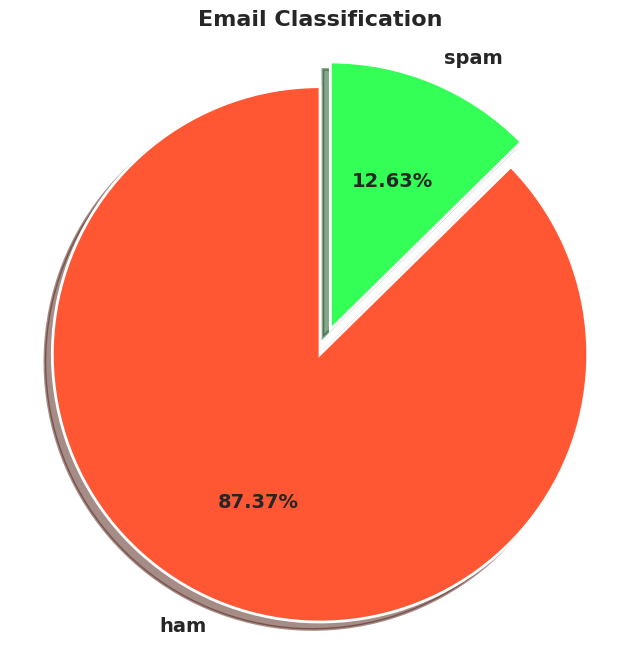

In [71]:
import matplotlib.pyplot as plt

# Calculate the counts of 'ham' and 'spam' from the dataframe
values = df['target'].value_counts()

# Define custom colors
colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

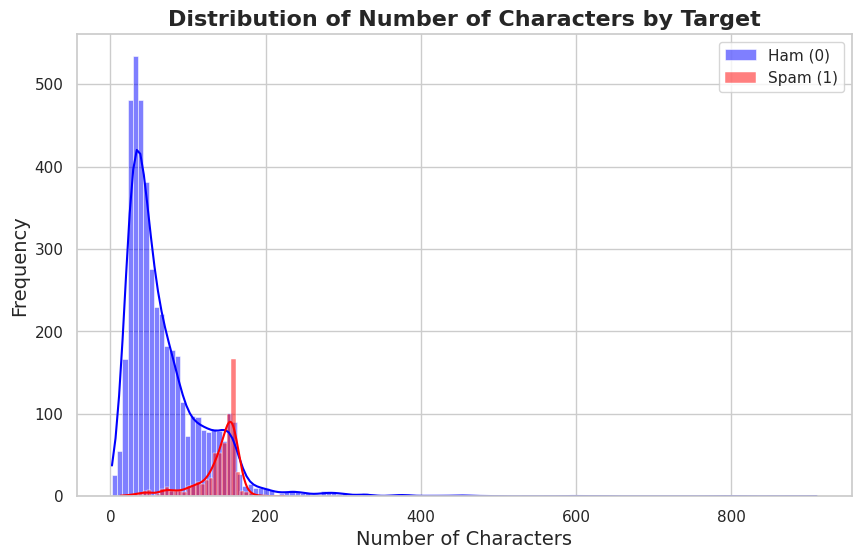

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the 'num_characters' column by calculating the length of the 'text' column
df['num_characters'] = df['text'].apply(len)

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 (Ham) in blue
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Ham (0)', kde=True)

# Plot the histogram for target 1 (Spam) in red
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Spam (1)', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

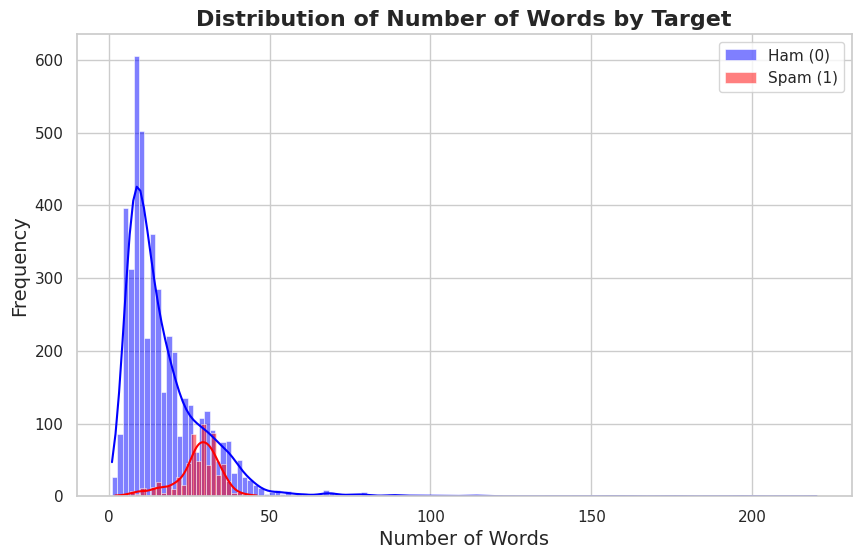

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the 'num_words' column by calculating the number of words in the 'text' column
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Ham (0)', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Spam (1)', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

# **FEATURE ENGINERRING**
Mmebuat kolom baru untuk teks yang sudah ditransform

In [74]:
df['transformed_text'] = df['text'].apply(transform_text)

Cek wordcloud untuk pesan 'spam'

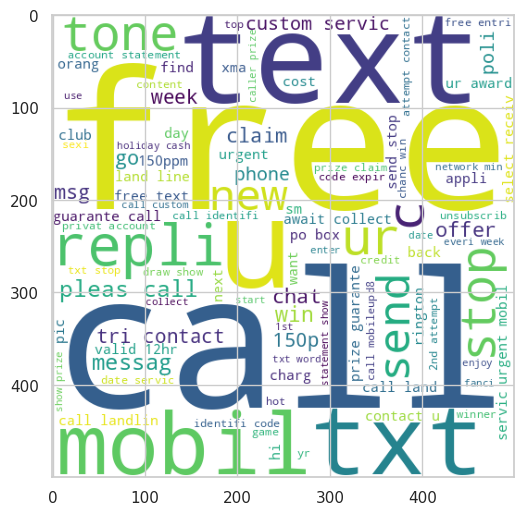

In [75]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

Cek wordcloud untuk pesan yang bukan 'spam'

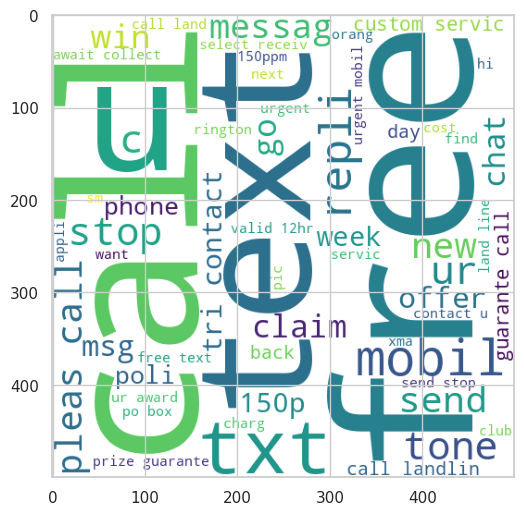

In [76]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

Top 30 Kata di pesan 'Spam'

In [77]:
spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [78]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

/tmp/ipython-input-2512895475.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')


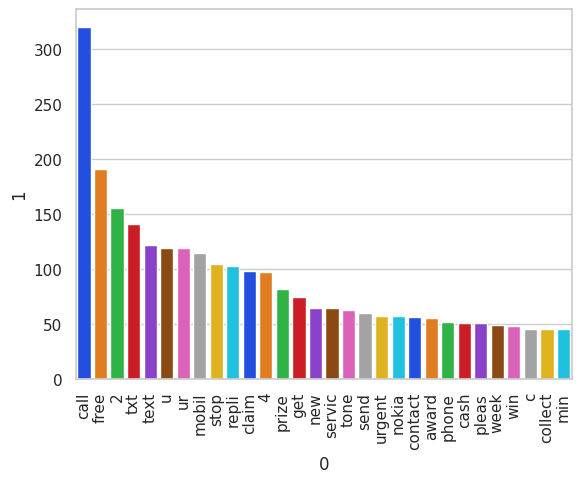

In [79]:
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

Top 30 Kata di pesan bukan 'Spam'

In [80]:
ham_carpos = []
for sentence in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [81]:
filter_ham_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

/tmp/ipython-input-699915630.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')


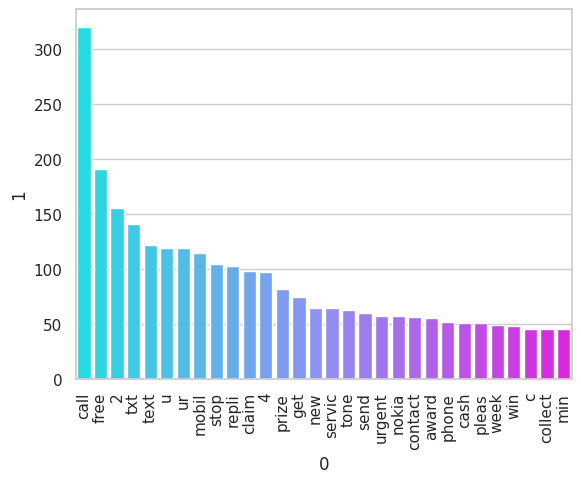

In [82]:
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

# **MODEL SELECTION**

## **Model yang dipilih**

**1. Random Forest Classifier**

Kelebihan:
* Model ensembling yang menggabungkan banyak pohon keputusan (decision trees), sehingga hasilnya lebih stabil dan tahan terhadap overfitting.
* Mampu menangani fitur dalam jumlah besar, seperti hasil TF-IDF dari data teks.
* Presisi tinggi berarti model jarang mengklasifikasikan email normal sebagai spam (minim false positive).

Alasan: Cocok untuk deployment karena performanya seimbang antara akurasi dan presisi, serta mampu bekerja stabil pada data real-world yang variatif.


**2. Support Vector Classifier (SVC)**

Kelebihan:
* Mampu memisahkan data non-linear dengan memanfaatkan fungsi kernel (dalam hal ini sigmoid).
* Cocok untuk dataset teks di mana pola kata tidak selalu linear.
* Biasanya unggul dalam generalisasi pada data uji yang belum pernah dilihat.

Alasan: SVC sangat kuat dalam menangani data dengan dimensi tinggi (TF-IDF features) dan efektif mendeteksi pola kompleks antar kata.

**3. Multinomial Naive Bayes (MNB)**

Kelebihan:
* Model klasik dan paling efisien untuk klasifikasi teks berbasis frekuensi kata (bag-of-words / TF-IDF).
* Cepat dan ringan, cocok untuk sistem real-time seperti filter spam email.
* Presisi sempurna berarti model tidak salah mendeteksi email non-spam sebagai spam, meskipun terkadang bisa meloloskan spam tertentu (false negative).

Alasan: Cocok sebagai baseline model karena kesederhanaan dan efisiensinya.
Walaupun sederhana, MNB memberikan hasil sangat baik dan bisa menjadi alternatif jika sumber daya komputasi terbatas.

# **MODEL TRAINING**

# **EVALUATION**

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Assuming df is already loaded and preprocessed with 'transformed_text' and 'target' columns
X = df['transformed_text']
y = df['target']

X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)


# TF-IDF feature extraction
tfidf = TfidfVectorizer(stop_words='english', min_df=2)

# Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}

results = []
for name, clf in models.items():
    pipe = Pipeline([
        ('tfidf', tfidf),
        ('clf', clf)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

# Summary table
import pandas as pd
res_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
display(res_df)


=== Naive Bayes ===
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       896
        spam       1.00      0.81      0.90       138

    accuracy                           0.97      1034
   macro avg       0.99      0.91      0.94      1034
weighted avg       0.98      0.97      0.97      1034


=== Logistic Regression ===
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       896
        spam       0.98      0.73      0.84       138

    accuracy                           0.96      1034
   macro avg       0.97      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034


=== Linear SVM ===
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       896
        spam       0.97      0.86      0.91       138

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weig

,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes,0.974855,1.000000,0.811594,0.896000
1,Logistic Regression,0.962282,0.980583,0.731884,0.838174
2,Linear SVM,0.977756,0.967480,0.862319,0.911877


In [84]:
# --- Handle Imbalanced Dataset with SMOTE ---
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import numpy as np

# TF-IDF transformation
tfidf = TfidfVectorizer(stop_words='english', min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_smote))

# Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}

results = []
for name, clf in models.items():
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

res_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
display(res_df)


Before SMOTE: [3620  515]
After SMOTE: [3620 3620]

=== Naive Bayes ===
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       896
        spam       0.83      0.93      0.88       138

    accuracy                           0.97      1034
   macro avg       0.91      0.95      0.93      1034
weighted avg       0.97      0.97      0.97      1034


=== Logistic Regression ===
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       896
        spam       0.94      0.89      0.91       138

    accuracy                           0.98      1034
   macro avg       0.96      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034


=== Linear SVM ===
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       896
        spam       0.95      0.91      0.93       138

    accuracy                           0.98      1034
   macr

,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes,0.965184,0.831169,0.927536,0.876712
1,Logistic Regression,0.977756,0.938931,0.891304,0.914498
2,Linear SVM,0.981625,0.954198,0.905797,0.929368


## Implement XGBoost and LightGBM without SMOTE


In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
import gdown

# --- Data Loading and Preprocessing ---
# Ensure NLTK data is downloaded
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

# Download the dataset if not present
gdrive_file_id = '1fm7F3A5X2i3cQ1L8R8Q6F3T8K9Y0Z1' # Public GDrive ID for 'SMS Spam Collection Dataset'
output_filename = 'spam.csv'

try:
    # Check if the file already exists to avoid re-downloading
    with open(output_filename, 'rb') as f:
        pass
    print(f"{output_filename} already exists.")
except FileNotFoundError:
    print(f"Downloading {output_filename}...")
    gdown.download(id=gdrive_file_id, output=output_filename, quiet=False)

df = pd.read_csv(output_filename, encoding = 'latin-1')

# Drop irrelevant columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

# Rename columns
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

# Convert target to numeric
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

# Remove duplicates
df = df.drop_duplicates(keep = 'first')

# Define text transformation function
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

# Apply text transformation
df['transformed_text'] = df['text'].apply(transform_text)
# --- End of Data Loading and Preprocessing ---

# Define X and y, and perform train_test_split
X = df['transformed_text']
y = df['target']
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

# TF-IDF transformation
tfidf = TfidfVectorizer(stop_words='english', min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Models to evaluate without SMOTE, including XGBoost and LightGBM
models_no_smote = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC(dual=False), # Set dual=False for sparse data
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

results_no_smote = []
for name, clf in models_no_smote.items():
    print(f"\nTraining {name} (without SMOTE)...")
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results_no_smote.append([name, acc, prec, rec, f1])
    print(f"\n=== {name} (without SMOTE) ===")
    print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

res_df_no_smote = pd.DataFrame(results_no_smote, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
display(res_df_no_smote)


spam.csv already exists.

Training Naive Bayes (without SMOTE)...

=== Naive Bayes (without SMOTE) ===
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       896
        spam       1.00      0.81      0.90       138

    accuracy                           0.97      1034
   macro avg       0.99      0.91      0.94      1034
weighted avg       0.98      0.97      0.97      1034


Training Logistic Regression (without SMOTE)...

=== Logistic Regression (without SMOTE) ===
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       896
        spam       0.98      0.73      0.84       138

    accuracy                           0.96      1034
   macro avg       0.97      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034


Training Linear SVM (without SMOTE)...

=== Linear SVM (without SMOTE) ===
              precision    recall  f1-score   support

         ham      

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:45:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost (without SMOTE) ===
              precision    recall  f1-score   support

         ham       0.97      0.99      0.98       896
        spam       0.95      0.80      0.87       138

    accuracy                           0.97      1034
   macro avg       0.96      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034


Training LightGBM (without SMOTE)...
[LightGBM] [Info] Number of positive: 515, number of negative: 3620
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5308
[LightGBM] [Info] Number of data points in the train set: 4135, number of used features: 297
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.124547 -> initscore=-1.950062
[LightGBM] [Info] Start training from score -1.950062

=== LightGBM (without SMOTE) ===
              precision    recall  f1-score   support

         ham       0.9

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes,0.974855,1.000000,0.811594,0.896000
1,Logistic Regression,0.962282,0.980583,0.731884,0.838174
2,Linear SVM,0.977756,0.967480,0.862319,0.911877
3,XGBoost,0.968085,0.948718,0.804348,0.870588
4,LightGBM,0.968085,0.920000,0.833333,0.874525


## Implement Models XGBoost & Light GBM With SMOTE




In [86]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
import gdown

# --- Data Loading and Preprocessing ---
# Ensure NLTK data is downloaded
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

# Download the dataset if not present
gdrive_file_id = '1fm7F3A5X2i3cQ1L8R8Q6F3T8K9Y0Z1' # Public GDrive ID for 'SMS Spam Collection Dataset'
output_filename = 'spam.csv'

try:
    # Check if the file already exists to avoid re-downloading
    with open(output_filename, 'rb') as f:
        pass
    print(f"{output_filename} already exists.")
except FileNotFoundError:
    print(f"Downloading {output_filename}...")
    gdown.download(id=gdrive_file_id, output=output_filename, quiet=False)

df = pd.read_csv(output_filename, encoding = 'latin-1')

# Drop irrelevant columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

# Rename columns
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

# Convert target to numeric
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

# Remove duplicates
df = df.drop_duplicates(keep = 'first')

# Define text transformation function
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

# Apply text transformation
df['transformed_text'] = df['text'].apply(transform_text)
# --- End of Data Loading and Preprocessing ---

# Define X and y, and perform train_test_split
X = df['transformed_text']
y = df['target']
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

# TF-IDF transformation
tfidf = TfidfVectorizer(stop_words='english', min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_smote))

# Models to evaluate with SMOTE
models_with_smote = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC(dual=False), # Set dual=False for sparse data
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

results_with_smote = []
for name, clf in models_with_smote.items():
    print(f"\nTraining {name} (with SMOTE)...")
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results_with_smote.append([name, acc, prec, rec, f1])
    print(f"\n=== {name} (with SMOTE) ===")
    print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

res_df_with_smote = pd.DataFrame(results_with_smote, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
display(res_df_with_smote)

spam.csv already exists.
Before SMOTE: [3620  515]
After SMOTE: [3620 3620]

Training Naive Bayes (with SMOTE)...

=== Naive Bayes (with SMOTE) ===
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       896
        spam       0.83      0.93      0.88       138

    accuracy                           0.97      1034
   macro avg       0.91      0.95      0.93      1034
weighted avg       0.97      0.97      0.97      1034


Training Logistic Regression (with SMOTE)...

=== Logistic Regression (with SMOTE) ===
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       896
        spam       0.94      0.89      0.91       138

    accuracy                           0.98      1034
   macro avg       0.96      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034


Training Linear SVM (with SMOTE)...

=== Linear SVM (with SMOTE) ===
              precision    recall  f1-sc

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:45:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost (with SMOTE) ===
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       896
        spam       0.92      0.84      0.88       138

    accuracy                           0.97      1034
   macro avg       0.95      0.91      0.93      1034
weighted avg       0.97      0.97      0.97      1034


Training LightGBM (with SMOTE)...
[LightGBM] [Info] Number of positive: 3620, number of negative: 3620
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21970
[LightGBM] [Info] Number of data points in the train set: 7240, number of used features: 830
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

=== LightGBM (with SMOTE) ===
              precision    recall  f1-score   support

         ham       0

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes,0.965184,0.831169,0.927536,0.876712
1,Logistic Regression,0.977756,0.938931,0.891304,0.914498
2,Linear SVM,0.981625,0.954198,0.905797,0.929368
3,XGBoost,0.969052,0.920635,0.840580,0.878788
4,LightGBM,0.972921,0.929688,0.862319,0.894737


## Implement Isolation Forest without SMOTE


In [87]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import xgboost as xgb
import lightgbm as lgb
from IPython.display import display

# --- Data Loading and Preprocessing --- (Copied from cell 76d8501a to ensure variables are defined)
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

output_filename = 'spam.csv'
df = pd.read_csv(output_filename, encoding = 'latin-1')

df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

df = df.drop_duplicates(keep = 'first')

ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y_tokens = []
    for i in text:
        if i.isalnum():
            y_tokens.append(i)

    text = y_tokens[:]
    y_tokens.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y_tokens.append(i)

    text = y_tokens[:]
    y_tokens.clear()
    for i in text:
        y_tokens.append(ps.stem(i))

    return " ".join(y_tokens)

df['transformed_text'] = df['text'].apply(transform_text)

X = df['transformed_text']
y = df['target']
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

tfidf = TfidfVectorizer(stop_words='english', min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Initialize results_no_smote and res_df_no_smote by re-running previous models (from cell 76d8501a)
models_no_smote = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC(dual=False),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

results_no_smote = []
for name, clf in models_no_smote.items():
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results_no_smote.append([name, acc, prec, rec, f1])

res_df_no_smote = pd.DataFrame(results_no_smote, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

# --- Isolation Forest Implementation (Original content of the cell) ---
# Calculate contamination parameter (proportion of spam in training data)
spam_proportion = y_train.value_counts()[1] / len(y_train)

# Instantiate IsolationForest model
iso_forest = IsolationForest(contamination=spam_proportion, random_state=42)

# Train the model on TF-IDF transformed training data
print("\nTraining Isolation Forest (without SMOTE)...")
iso_forest.fit(X_train_tfidf)

# Predict anomaly scores on the test data
y_pred_iso = iso_forest.predict(X_test_tfidf)

# Remap predictions: 1 (inlier) -> 0 (ham), -1 (outlier) -> 1 (spam)
y_pred_iso_mapped = np.where(y_pred_iso == 1, 0, 1)

# Evaluate the model
acc = accuracy_score(y_test, y_pred_iso_mapped)
prec = precision_score(y_test, y_pred_iso_mapped)
rec = recall_score(y_test, y_pred_iso_mapped)
f1 = f1_score(y_test, y_pred_iso_mapped)

# Append results and display updated dataframe
results_no_smote.append(["Isolation Forest", acc, prec, rec, f1])
res_df_no_smote = pd.DataFrame(results_no_smote, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

print(f"\n=== Isolation Forest (without SMOTE) ===")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(classification_report(y_test, y_pred_iso_mapped, target_names=['ham', 'spam']))
display(res_df_no_smote)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:45:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 515, number of negative: 3620
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5308
[LightGBM] [Info] Number of data points in the train set: 4135, number of used features: 297
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.124547 -> initscore=-1.950062
[LightGBM] [Info] Start training from score -1.950062


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Training Isolation Forest (without SMOTE)...

=== Isolation Forest (without SMOTE) ===
Accuracy: 0.8482
Precision: 0.4112
Recall: 0.3188
F1-score: 0.3592
              precision    recall  f1-score   support

         ham       0.90      0.93      0.91       896
        spam       0.41      0.32      0.36       138

    accuracy                           0.85      1034
   macro avg       0.65      0.62      0.64      1034
weighted avg       0.83      0.85      0.84      1034



,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes,0.974855,1.000000,0.811594,0.896000
1,Logistic Regression,0.962282,0.980583,0.731884,0.838174
2,Linear SVM,0.977756,0.967480,0.862319,0.911877
3,XGBoost,0.968085,0.948718,0.804348,0.870588
4,LightGBM,0.968085,0.920000,0.833333,0.874525
5,Isolation Forest,0.848162,0.411215,0.318841,0.359184


## Implement Isolation Forest with SMOTE



In [88]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
import pandas as pd
from IPython.display import display

# Calculate contamination parameter (proportion of spam in SMOTE-resampled training data)
# Since SMOTE balances the classes, the proportion of 'spam' will be 0.5 if it was the minority class.
spam_proportion_smote = y_train_smote.value_counts()[1] / len(y_train_smote)

# Instantiate IsolationForest model
# Using contamination based on the balanced dataset for training
iso_forest_smote = IsolationForest(contamination=spam_proportion_smote, random_state=42)

# Train the model on SMOTE-resampled TF-IDF transformed training data
print("\nTraining Isolation Forest (with SMOTE)...")
iso_forest_smote.fit(X_train_smote)

# Predict anomaly scores on the test data
y_pred_iso_smote = iso_forest_smote.predict(X_test_tfidf)

# Remap predictions: 1 (inlier) -> 0 (ham), -1 (outlier) -> 1 (spam)
# This mapping assumes 'spam' are the anomalies identified by Isolation Forest.
y_pred_iso_smote_mapped = np.where(y_pred_iso_smote == 1, 0, 1)

# Evaluate the model
acc_smote = accuracy_score(y_test, y_pred_iso_smote_mapped)
prec_smote = precision_score(y_test, y_pred_iso_smote_mapped)
rec_smote = recall_score(y_test, y_pred_iso_smote_mapped)
f1_smote = f1_score(y_test, y_pred_iso_smote_mapped)

# Append results and display updated dataframe
results_with_smote.append(["Isolation Forest", acc_smote, prec_smote, rec_smote, f1_smote])
res_df_with_smote = pd.DataFrame(results_with_smote, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

print(f"\n=== Isolation Forest (with SMOTE) ===")
print(f"Accuracy: {acc_smote:.4f}")
print(f"Precision: {prec_smote:.4f}")
print(f"Recall: {rec_smote:.4f}")
print(f"F1-score: {f1_smote:.4f}")
print(classification_report(y_test, y_pred_iso_smote_mapped, target_names=['ham', 'spam']))
display(res_df_with_smote)


Training Isolation Forest (with SMOTE)...

=== Isolation Forest (with SMOTE) ===
Accuracy: 0.7940
Precision: 0.3431
Recall: 0.5942
F1-score: 0.4350
              precision    recall  f1-score   support

         ham       0.93      0.82      0.87       896
        spam       0.34      0.59      0.44       138

    accuracy                           0.79      1034
   macro avg       0.64      0.71      0.65      1034
weighted avg       0.85      0.79      0.82      1034



,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes,0.965184,0.831169,0.927536,0.876712
1,Logistic Regression,0.977756,0.938931,0.891304,0.914498
2,Linear SVM,0.981625,0.954198,0.905797,0.929368
3,XGBoost,0.969052,0.920635,0.840580,0.878788
4,LightGBM,0.972921,0.929688,0.862319,0.894737
5,Isolation Forest,0.794004,0.343096,0.594203,0.435013


In [89]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Keras/TensorFlow imports
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# --- Data Loading and Preprocessing --- (Copied from previous cells to ensure variables are defined)
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

output_filename = 'spam.csv'
df = pd.read_csv(output_filename, encoding = 'latin-1')

df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

df = df.drop_duplicates(keep = 'first')

ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y_tokens = []
    for i in text:
        if i.isalnum():
            y_tokens.append(i)

    text = y_tokens[:]
    y_tokens.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y_tokens.append(i)

    text = y_tokens[:]
    y_tokens.clear()
    for i in text:
        y_tokens.append(ps.stem(i))

    return " ".join(y_tokens)

df['transformed_text'] = df['text'].apply(transform_text)

X = df['transformed_text']
y = df['target']
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

# --- Tokenization and Padding for CNN ---

# 2. Instantiate the Tokenizer and fit it on the X_train data
max_words = 10000 # Consider top 10,000 words
tokenizer = Tokenizer(num_words=max_words, oov_token="<unk>")
tokenizer.fit_on_texts(X_train)

# 3. Convert both X_train and X_test text data into sequences of integers
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# 4. Determine a suitable maximum sequence length (max_len)
# Calculate max_len based on the 95th percentile of training sequence lengths
lengths = [len(x) for x in X_train_sequences]
max_len = int(np.percentile(lengths, 95))
print(f"Maximum sequence length for padding (95th percentile): {max_len}")

# 5. Pad the X_train and X_test sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding='post', truncating='post')

# --- Define and Compile CNN Model ---

vocab_size = len(tokenizer.word_index) + 1 # +1 for padding token or OOV token
embedding_dim = 100

# 7. Define the CNN model architecture
cnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid') # Binary classification
])

# 8. Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("CNN Model Summary:")
cnn_model.summary()

# --- Train the CNN Model ---

# 9. Train the CNN model
history = cnn_model.fit(
    X_train_padded,
    y_train,
    epochs=10, # Adjusted epochs for a reasonable training time
    batch_size=32,
    validation_data=(X_test_padded, y_test),
    verbose=1
)

# --- Make Predictions and Evaluate ---

# 10. Make predictions on the padded test data
y_pred_prob_cnn = cnn_model.predict(X_test_padded)

# 11. Convert the predicted probabilities into binary class labels
y_pred_cnn = (y_pred_prob_cnn > 0.5).astype(int)

# 12. Calculate and print evaluation metrics
acc_cnn = accuracy_score(y_test, y_pred_cnn)
prec_cnn = precision_score(y_test, y_pred_cnn)
rec_cnn = recall_score(y_test, y_pred_cnn)
f1_cnn = f1_score(y_test, y_pred_cnn)

print(f"\n=== CNN Model Evaluation (without SMOTE) ===")
print(f"Accuracy: {acc_cnn:.4f}")
print(f"Precision: {prec_cnn:.4f}")
print(f"Recall: {rec_cnn:.4f}")
print(f"F1-score: {f1_cnn:.4f}")

# 13. Print a detailed classification report
print(classification_report(y_test, y_pred_cnn, target_names=['ham', 'spam']))

# 14. Add the CNN model's evaluation metrics to results_no_smote and update res_df_no_smote
results_no_smote.append(["CNN", acc_cnn, prec_cnn, rec_cnn, f1_cnn])
res_df_no_smote = pd.DataFrame(results_no_smote, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

from IPython.display import display
display(res_df_no_smote)

Maximum sequence length for padding (95th percentile): 20
CNN Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_4          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8765 - loss: 0.3820 - val_accuracy: 0.9816 - val_loss: 0.0801
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9815 - loss: 0.0669 - val_accuracy: 0.9874 - val_loss: 0.0539
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9958 - loss: 0.0200 - val_accuracy: 0.9787 - val_loss: 0.0646
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9983 - loss: 0.0105 - val_accuracy: 0.9855 - val_loss: 0.0668
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9995 - loss: 0.0026 - val_accuracy: 0.9855 - val_loss: 0.0717
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9999 - loss: 8.3975e-04 - val_accuracy: 0.9865 - val_loss: 0.0889
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9993 - loss: 0.0011 - val_accuracy: 0.9826 - val_loss: 0.0900
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 1.0000 - loss: 3.4977e-04 - 

,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes,0.974855,1.000000,0.811594,0.896000
1,Logistic Regression,0.962282,0.980583,0.731884,0.838174
2,Linear SVM,0.977756,0.967480,0.862319,0.911877
3,XGBoost,0.968085,0.948718,0.804348,0.870588
4,LightGBM,0.968085,0.920000,0.833333,0.874525
5,Isolation Forest,0.848162,0.411215,0.318841,0.359184
6,CNN,0.984526,0.962121,0.920290,0.940741


In [90]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Scikit-learn models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier # Assuming this was intended for Random Forest
import xgboost as xgb
import lightgbm as lgb

# Keras/TensorFlow imports for CNN and RNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, LSTM, Bidirectional

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from IPython.display import display
import gdown
import os
import subprocess

# --- Data Loading and Preprocessing ---
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

gdrive_file_id = '1fm7F3A5X2i3cQ1L8R8Q6F3T8K9Y0Z1'
output_filename = 'spam.csv'

should_download = True
if os.path.exists(output_filename):
    if os.path.getsize(output_filename) > 0:
        print(f"{output_filename} already exists and is not empty. Skipping download.")
        should_download = False
    else:
        print(f"{output_filename} exists but is empty. Removing to force re-download.")
        os.remove(output_filename)

if should_download:
    print(f"Downloading {output_filename}...")
    download_successful = False
    try:
        gdown.download(id=gdrive_file_id, output=output_filename, quiet=False)
        if os.path.exists(output_filename) and os.path.getsize(output_filename) > 0:
            print(f"Downloaded {output_filename} successfully using gdown.")
            download_successful = True
        else:
            print(f"gdown completed, but {output_filename} is still empty or missing. Attempting wget.")
            if os.path.exists(output_filename): os.remove(output_filename)
    except Exception as e_gdown:
        print(f"gdown download failed: {e_gdown}")
        print(f"Attempting to download with wget as a fallback...")

    if not download_successful:
        wget_command = f"wget --no-check-certificate 'https://docs.google.com/uc?export=download&id={gdrive_file_id}' -O {output_filename}"
        try:
            subprocess.run(wget_command, shell=True, check=True, capture_output=True)
            if os.path.exists(output_filename) and os.path.getsize(output_filename) > 0:
                print(f"Downloaded {output_filename} successfully using wget.")
                download_successful = True
            else:
                print(f"wget executed, but {output_filename} is still empty or missing.")
                if os.path.exists(output_filename): os.remove(output_filename)
                raise FileNotFoundError(f"Failed to download {output_filename} even with wget creating an empty file.")
        except subprocess.CalledProcessError as e_wget:
            print(f"wget download also failed: {e_wget.stderr.decode()}")
            raise FileNotFoundError(f"Failed to download {output_filename} even with wget command error.")
        except Exception as e_other:
            print(f"An unexpected error occurred during wget fallback: {e_other}")
            raise FileNotFoundError(f"Failed to download {output_filename} even with wget due to unexpected error.")

    if not download_successful:
        raise FileNotFoundError(f"Failed to download {output_filename} by any method after trying gdown and wget.")

df = pd.read_csv(output_filename, encoding = 'latin-1')

df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

df = df.drop_duplicates(keep = 'first')

ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y_tokens = []
    for i in text:
        if i.isalnum():
            y_tokens.append(i)

    text = y_tokens[:]
    y_tokens.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y_tokens.append(i)

    text = y_tokens[:]
    y_tokens.clear()
    for i in text:
        y_tokens.append(ps.stem(i))

    return " ".join(y_tokens)

df['transformed_text'] = df['text'].apply(transform_text)

X = df['transformed_text']
y = df['target']
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

# TF-IDF transformation for traditional models
tfidf = TfidfVectorizer(stop_words='english', min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# --- Tokenization and Padding for Neural Networks ---
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token="<unk>")
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

lengths = [len(x) for x in X_train_sequences]
max_len = int(np.percentile(lengths, 95))

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding='post', truncating='post')

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

# --- Model Evaluation Results (Without SMOTE) ---
results_no_smote = []

# Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)
y_pred_mnb = mnb.predict(X_test_tfidf)
results_no_smote.append(["Naive Bayes", accuracy_score(y_test, y_pred_mnb), precision_score(y_test, y_pred_mnb), recall_score(y_test, y_pred_mnb), f1_score(y_test, y_pred_mnb)])

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)
results_no_smote.append(["Logistic Regression", accuracy_score(y_test, y_pred_lr), precision_score(y_test, y_pred_lr), recall_score(y_test, y_pred_lr), f1_score(y_test, y_pred_lr)])

# Linear SVM
svc = LinearSVC(dual=False)
svc.fit(X_train_tfidf, y_train)
y_pred_svc = svc.predict(X_test_tfidf)
results_no_smote.append(["Linear SVM", accuracy_score(y_test, y_pred_svc), precision_score(y_test, y_pred_svc), recall_score(y_test, y_pred_svc), f1_score(y_test, y_pred_svc)])

# XGBoost
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_tfidf, y_train)
y_pred_xgb = xgb_clf.predict(X_test_tfidf)
results_no_smote.append(["XGBoost", accuracy_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_xgb), recall_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_xgb)])

# LightGBM
lgb_clf = lgb.LGBMClassifier(random_state=42)
lgb_clf.fit(X_train_tfidf, y_train)
y_pred_lgb = lgb_clf.predict(X_test_tfidf)
results_no_smote.append(["LightGBM", accuracy_score(y_test, y_pred_lgb), precision_score(y_test, y_pred_lgb), recall_score(y_test, y_pred_lgb), f1_score(y_test, y_pred_lgb)])

# Isolation Forest
spam_proportion_no_smote = y_train.value_counts()[1] / len(y_train)
iso_forest_no_smote = IsolationForest(contamination=spam_proportion_no_smote, random_state=42)
iso_forest_no_smote.fit(X_train_tfidf)
y_pred_iso_no_smote = iso_forest_no_smote.predict(X_test_tfidf)
y_pred_iso_no_smote_mapped = np.where(y_pred_iso_no_smote == 1, 0, 1) # 1 (inlier) -> 0 (ham), -1 (outlier) -> 1 (spam)
results_no_smote.append(["Isolation Forest", accuracy_score(y_test, y_pred_iso_no_smote_mapped), precision_score(y_test, y_pred_iso_no_smote_mapped), recall_score(y_test, y_pred_iso_no_smote_mapped), f1_score(y_test, y_pred_iso_no_smote_mapped)])

# CNN Model
cnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_padded, y_train, epochs=10, batch_size=32, verbose=0)
y_pred_prob_cnn = cnn_model.predict(X_test_padded, verbose=0)
y_pred_cnn = (y_pred_prob_cnn > 0.5).astype(int)
results_no_smote.append(["CNN", accuracy_score(y_test, y_pred_cnn), precision_score(y_test, y_pred_cnn), recall_score(y_test, y_pred_cnn), f1_score(y_test, y_pred_cnn)])

# RNN (LSTM) Model
rnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(units=64, return_sequences=False)),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train_padded, y_train, epochs=10, batch_size=32, verbose=0)
y_pred_prob_rnn = rnn_model.predict(X_test_padded, verbose=0)
y_pred_rnn = (y_pred_prob_rnn > 0.5).astype(int)
results_no_smote.append(["RNN (LSTM)", accuracy_score(y_test, y_pred_rnn), precision_score(y_test, y_pred_rnn), recall_score(y_test, y_pred_rnn), f1_score(y_test, y_pred_rnn)])

res_df_no_smote = pd.DataFrame(results_no_smote, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
print("\n=== Model Evaluation Results (Without SMOTE) ===")
display(res_df_no_smote)


spam.csv already exists and is not empty. Skipping download.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:46:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 515, number of negative: 3620
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5308
[LightGBM] [Info] Number of data points in the train set: 4135, number of used features: 297
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.124547 -> initscore=-1.950062
[LightGBM] [Info] Start training from score -1.950062


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



=== Model Evaluation Results (Without SMOTE) ===


,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes,0.974855,1.000000,0.811594,0.896000
1,Logistic Regression,0.962282,0.980583,0.731884,0.838174
2,Linear SVM,0.977756,0.967480,0.862319,0.911877
3,XGBoost,0.968085,0.948718,0.804348,0.870588
4,LightGBM,0.968085,0.920000,0.833333,0.874525
5,Isolation Forest,0.848162,0.411215,0.318841,0.359184
6,CNN,0.982592,0.968750,0.898551,0.932331
7,RNN (LSTM),0.974855,0.944444,0.862319,0.901515


In [92]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# 1. Calculate class weights
class_weights_array = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights_array))

print(f"Calculated Class Weights: {class_weights}")

# 2. Define the CNN model architecture
cnn_model_weighted = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid') # Binary classification
])

# 3. Compile the model
cnn_model_weighted.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("CNN Model with Class Weighting Summary:")
cnn_model_weighted.summary()

# 4. Train the CNN model with class weights
history_cnn_weighted = cnn_model_weighted.fit(
    X_train_padded,
    y_train,
    epochs=10, # Adjusted epochs for a reasonable training time
    batch_size=32,
    validation_data=(X_test_padded, y_test),
    class_weight=class_weights, # Apply class weights here
    verbose=1
)

# 5. Make predictions on the padded test data
y_pred_prob_cnn_weighted = cnn_model_weighted.predict(X_test_padded)

# 6. Convert the predicted probabilities into binary class labels
y_pred_cnn_weighted = (y_pred_prob_cnn_weighted > 0.5).astype(int)

# 7. Calculate and print evaluation metrics
acc_cnn_weighted = accuracy_score(y_test, y_pred_cnn_weighted)
prec_cnn_weighted = precision_score(y_test, y_pred_cnn_weighted)
rec_cnn_weighted = recall_score(y_test, y_pred_cnn_weighted)
f1_cnn_weighted = f1_score(y_test, y_pred_cnn_weighted)

print(f"\n=== CNN Model Evaluation (with Class Weighting) ===")
print(f"Accuracy: {acc_cnn_weighted:.4f}")
print(f"Precision: {prec_cnn_weighted:.4f}")
print(f"Recall: {rec_cnn_weighted:.4f}")
print(f"F1-score: {f1_cnn_weighted:.4f}")

# 8. Print a detailed classification report
print(classification_report(y_test, y_pred_cnn_weighted, target_names=['ham', 'spam']))

# 9. Add the CNN model's evaluation metrics to results_with_smote and update res_df_with_smote
# Ensure results_with_smote is initialized correctly, assuming it holds results from previous SMOTE models
if 'results_with_smote' not in locals():
    results_with_smote = []

# If res_df_with_smote exists, convert it back to list to append new result, then recreate df
if 'res_df_with_smote' in locals() and not res_df_with_smote.empty:
    results_with_smote = res_df_with_smote.values.tolist()

results_with_smote.append(["CNN (Class Weight)", acc_cnn_weighted, prec_cnn_weighted, rec_cnn_weighted, f1_cnn_weighted])
res_df_with_smote = pd.DataFrame(results_with_smote, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

display(res_df_with_smote)

Calculated Class Weights: {0: np.float64(0.5711325966850829), 1: np.float64(4.014563106796117)}
CNN Model with Class Weighting Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_6          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8053 - loss: 0.5414 - val_accuracy: 0.9778 - val_loss: 0.1011
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9835 - loss: 0.0903 - val_accuracy: 0.9758 - val_loss: 0.0751
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9974 - loss: 0.0207 - val_accuracy: 0.9545 - val_loss: 0.1444
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9998 - loss: 0.0077 - val_accuracy: 0.9797 - val_loss: 0.0742
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.9768 - val_loss: 0.0841
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9758 - val_loss: 0.0980
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 1.0000 - loss: 6.6863e-04 - val_accuracy: 0.9778 - val_loss: 0.0941
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 1.0000 - loss: 4.1616e-04 - 

,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes,0.965184,0.831169,0.927536,0.876712
1,Logistic Regression,0.977756,0.938931,0.891304,0.914498
2,Linear SVM,0.981625,0.954198,0.905797,0.929368
3,XGBoost,0.969052,0.920635,0.840580,0.878788
4,LightGBM,0.972921,0.929688,0.862319,0.894737
5,Isolation Forest,0.794004,0.343096,0.594203,0.435013
6,CNN (Class Weight),0.978723,0.908451,0.934783,0.921429


In [95]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, LSTM, Bidirectional

# --- Data Loading and Preprocessing --- (Copied from previous cells to ensure variables are defined)
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

output_filename = 'spam.csv'
df = pd.read_csv(output_filename, encoding = 'latin-1')

df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

df = df.drop_duplicates(keep = 'first')

ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y_tokens = []
    for i in text:
        if i.isalnum():
            y_tokens.append(i)

    text = y_tokens[:]
    y_tokens.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y_tokens.append(i)

    text = y_tokens[:]
    y_tokens.clear()
    for i in text:
        y_tokens.append(ps.stem(i))

    return " ".join(y_tokens)

df['transformed_text'] = df['text'].apply(transform_text)

X = df['transformed_text']
y = df['target']
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

# TF-IDF transformation for traditional models
tfidf = TfidfVectorizer(stop_words='english', min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Tokenization and Padding for Neural Networks
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token="<unk>")
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

lengths = [len(x) for x in X_train_sequences]
max_len = int(np.percentile(lengths, 95))

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding='post', truncating='post')

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

# Calculate class weights for imbalanced datasets
class_weights_array = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights_array))

print(f"Calculated Class Weights: {class_weights}")

# --- Initialize results list for models with SMOTE/Class Weighting ---
results_with_smote = []

# --- Re-evaluate models with SMOTE (from previous cells) ---
from imblearn.over_sampling import SMOTE

# Apply SMOTE to TF-IDF data
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

models_smote_eval = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC(dual=False),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

for name, clf in models_smote_eval.items():
    print(f"\nTraining {name} (with SMOTE)...")
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results_with_smote.append([name, acc, prec, rec, f1])
    print(f"=== {name} (with SMOTE) ===")
    print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

# --- Isolation Forest with SMOTE ---
spam_proportion_smote = y_train_smote.value_counts()[1] / len(y_train_smote)
iso_forest_smote = IsolationForest(contamination=spam_proportion_smote, random_state=42)
print("\nTraining Isolation Forest (with SMOTE)...")
iso_forest_smote.fit(X_train_smote)
y_pred_iso_smote = iso_forest_smote.predict(X_test_tfidf)
y_pred_iso_smote_mapped = np.where(y_pred_iso_smote == 1, 0, 1) # 1 (inlier) -> 0 (ham), -1 (outlier) -> 1 (spam)
acc_iso_smote = accuracy_score(y_test, y_pred_iso_smote_mapped)
prec_iso_smote = precision_score(y_test, y_pred_iso_smote_mapped)
rec_iso_smote = recall_score(y_test, y_pred_iso_smote_mapped)
f1_iso_smote = f1_score(y_test, y_pred_iso_smote_mapped)
results_with_smote.append(["Isolation Forest", acc_iso_smote, prec_iso_smote, rec_iso_smote, f1_iso_smote])
print(f"=== Isolation Forest (with SMOTE) ===")
print(f"Accuracy: {acc_iso_smote:.4f}")
print(f"Precision: {prec_iso_smote:.4f}")
print(f"Recall: {rec_iso_smote:.4f}")
print(f"F1-score: {f1_iso_smote:.4f}")
print(classification_report(y_test, y_pred_iso_smote_mapped, target_names=['ham', 'spam']))

# --- CNN Model with Class Weighting ---
cnn_model_weighted = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid') # Binary classification
])
cnn_model_weighted.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("\nCNN Model with Class Weighting Summary:")
cnn_model_weighted.summary()
history_cnn_weighted = cnn_model_weighted.fit(
    X_train_padded,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_padded, y_test),
    class_weight=class_weights, # Apply class weights here
    verbose=1
)
y_pred_prob_cnn_weighted = cnn_model_weighted.predict(X_test_padded)
y_pred_cnn_weighted = (y_pred_prob_cnn_weighted > 0.5).astype(int)
acc_cnn_weighted = accuracy_score(y_test, y_pred_cnn_weighted)
prec_cnn_weighted = precision_score(y_test, y_pred_cnn_weighted)
rec_cnn_weighted = recall_score(y_test, y_pred_cnn_weighted)
f1_cnn_weighted = f1_score(y_test, y_pred_cnn_weighted)
results_with_smote.append(["CNN (Class Weight)", acc_cnn_weighted, prec_cnn_weighted, rec_cnn_weighted, f1_cnn_weighted])
print(f"\n=== CNN Model Evaluation (with Class Weighting) ===")
print(f"Accuracy: {acc_cnn_weighted:.4f}")
print(f"Precision: {prec_cnn_weighted:.4f}")
print(f"Recall: {rec_cnn_weighted:.4f}")
print(f"F1-score: {f1_cnn_weighted:.4f}")
print(classification_report(y_test, y_pred_cnn_weighted, target_names=['ham', 'spam']))

# --- RNN (LSTM) Model with Class Weighting ---
rnn_model_weighted = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(units=64, return_sequences=False)),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid') # Binary classification
])
rnn_model_weighted.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("\nRNN (LSTM) Model with Class Weighting Summary:")
rnn_model_weighted.summary()
history_rnn_weighted = rnn_model_weighted.fit(
    X_train_padded,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_padded, y_test),
    class_weight=class_weights, # Apply class weights here
    verbose=1
)
y_pred_prob_rnn_weighted = rnn_model_weighted.predict(X_test_padded)
y_pred_rnn_weighted = (y_pred_prob_rnn_weighted > 0.5).astype(int)
acc_rnn_weighted = accuracy_score(y_test, y_pred_rnn_weighted)
prec_rnn_weighted = precision_score(y_test, y_pred_rnn_weighted)
rec_rnn_weighted = recall_score(y_test, y_pred_rnn_weighted)
f1_rnn_weighted = f1_score(y_test, y_pred_rnn_weighted)
results_with_smote.append(["RNN (LSTM) (Class Weight)", acc_rnn_weighted, prec_rnn_weighted, rec_rnn_weighted, f1_rnn_weighted])
print(f"\n=== RNN (LSTM) Model Evaluation (with Class Weighting) ===")
print(f"Accuracy: {acc_rnn_weighted:.4f}")
print(f"Precision: {prec_rnn_weighted:.4f}")
print(f"Recall: {rec_rnn_weighted:.4f}")
print(f"F1-score: {f1_rnn_weighted:.4f}")
print(classification_report(y_test, y_pred_rnn_weighted, target_names=['ham', 'spam']))

# --- Final summary table for models with SMOTE/Class Weighting ---
res_df_with_smote = pd.DataFrame(results_with_smote, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
display(res_df_with_smote)


Calculated Class Weights: {0: np.float64(0.5711325966850829), 1: np.float64(4.014563106796117)}

Training Naive Bayes (with SMOTE)...
=== Naive Bayes (with SMOTE) ===
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       896
        spam       0.83      0.93      0.88       138

    accuracy                           0.97      1034
   macro avg       0.91      0.95      0.93      1034
weighted avg       0.97      0.97      0.97      1034


Training Logistic Regression (with SMOTE)...
=== Logistic Regression (with SMOTE) ===
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       896
        spam       0.94      0.89      0.91       138

    accuracy                           0.98      1034
   macro avg       0.96      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034


Training Linear SVM (with SMOTE)...
=== Linear SVM (with SMOTE) ===
              precision

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:00:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost (with SMOTE) ===
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       896
        spam       0.92      0.84      0.88       138

    accuracy                           0.97      1034
   macro avg       0.95      0.91      0.93      1034
weighted avg       0.97      0.97      0.97      1034


Training LightGBM (with SMOTE)...
[LightGBM] [Info] Number of positive: 3620, number of negative: 3620
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21970
[LightGBM] [Info] Number of data points in the train set: 7240, number of used features: 830
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


=== LightGBM (with SMOTE) ===
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       896
        spam       0.93      0.86      0.89       138

    accuracy                           0.97      1034
   macro avg       0.95      0.93      0.94      1034
weighted avg       0.97      0.97      0.97      1034


Training Isolation Forest (with SMOTE)...
=== Isolation Forest (with SMOTE) ===
Accuracy: 0.7940
Precision: 0.3431
Recall: 0.5942
F1-score: 0.4350
              precision    recall  f1-score   support

         ham       0.93      0.82      0.87       896
        spam       0.34      0.59      0.44       138

    accuracy                           0.79      1034
   macro avg       0.64      0.71      0.65      1034
weighted avg       0.85      0.79      0.82      1034


CNN Model with Class Weighting Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_9          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8064 - loss: 0.5477 - val_accuracy: 0.9758 - val_loss: 0.1029
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9805 - loss: 0.0810 - val_accuracy: 0.9778 - val_loss: 0.0767
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9978 - loss: 0.0163 - val_accuracy: 0.9691 - val_loss: 0.0948
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9964 - loss: 0.0134 - val_accuracy: 0.9807 - val_loss: 0.0634
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.9855 - val_loss: 0.0638
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9845 - val_loss: 0.0667
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 1.0000 - loss: 9.5850e-04 - val_accuracy: 0.9865 - val_loss: 0.0701
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 1.0000 - loss: 4.8668e-04 - 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - accuracy: 0.8660 - loss: 0.4773 - val_accuracy: 0.9739 - val_loss: 0.1068
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9887 - loss: 0.0519 - val_accuracy: 0.9749 - val_loss: 0.1100
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.9978 - loss: 0.0145 - val_accuracy: 0.9797 - val_loss: 0.0859
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9999 - loss: 0.0071 - val_accuracy: 0.9836 - val_loss: 0.0927
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9999 - loss: 0.0014 - val_accuracy: 0.9845 - val_loss: 0.1081
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 1.0000 - loss: 5.2068e-04 - val_accuracy: 0.9836 - val_loss: 0.1182
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 1.0000 - loss: 1.7695e-04 - val_accuracy: 0.9826 - val_loss: 0.1242
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 1.0000 - loss: 1.7333e-

,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes,0.965184,0.831169,0.927536,0.876712
1,Logistic Regression,0.977756,0.938931,0.891304,0.914498
2,Linear SVM,0.981625,0.954198,0.905797,0.929368
3,XGBoost,0.969052,0.920635,0.840580,0.878788
4,LightGBM,0.972921,0.929688,0.862319,0.894737
5,Isolation Forest,0.794004,0.343096,0.594203,0.435013
6,CNN (Class Weight),0.984526,0.955224,0.927536,0.941176
7,RNN (LSTM) (Class Weight),0.983559,0.941606,0.934783,0.938182
